In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

atuona pf
butaritari ki
marsh harbour bs
port elizabeth za
port elizabeth za
rawson ar
nikolskoye ru
ostrovnoy ru
butaritari ki
rikitea pf
mataura pf
vaini to
ushuaia ar
asfi ma
klaksvik fo
albany au
atuona pf
keflavik is
mahebourg mu
vaini to
ushuaia ar
nikolskoye ru
marzuq ly
barra do garcas br
albany au
tromso no
pangnirtung ca
puerto ayora ec
busselton au
hobart au
severo-kurilsk ru
staryy nadym ru
qui nhon vn
taolanaro mg
manta ec
mataura pf
lebu cl
saleaula ws
bluff nz
butaritari ki
punta arenas cl
puerto ayora ec
ye mm
bredasdorp za
busselton au
belaya gora ru
lazaro cardenas mx
saint-philippe re
illoqqortoormiut gl
toliary mg
lavrentiya ru
qaanaaq gl
hermanus za
albany au
domoni km
new norfolk au
hermanus za
rikitea pf
ribeira grande pt
hithadhoo mv
barentsburg sj
vaini to
bluff nz
oranjemund na
butaritari ki
belushya guba ru
bambous virieux mu
vaitape pf
verkhnyaya inta ru
verkhnyaya inta ru
dikson ru
qaanaaq gl
albany au
nizhneyansk ru
mataura pf
dingle ie
marsaxlokk mt
alban

nemuro jp
jamestown sh
busselton au
busselton au
muyezerskiy ru
albany au
ancud cl
rikitea pf
tuktoyaktuk ca
albany au
mataura pf
formoso do araguaia br
provideniya ru
rikitea pf
ushuaia ar
phan thiet vn
pokrovskoye ru
lavrentiya ru
bambous virieux mu
longyearbyen sj
manta ec
hermanus za
taolanaro mg
pallipattu in
conde br
faanui pf
beringovskiy ru
puerto ayora ec
hithadhoo mv
albany au
victoria sc
changping cn
albany au
hermanus za
ushuaia ar
portland us
saint-philippe re
vaini to
cape town za
padang id
maneadero mx
east london za
quelimane mz
avarua ck
dikson ru
mataura pf
yulara au
jackson us
ushuaia ar
elbistan tr
saint george bm
sandusky us
khatanga ru
victoria sc
atuona pf
codrington ag
husavik is
port alfred za
bredasdorp za
bluff nz
ojinaga mx
grand river south east mu
dikson ru
saint anthony ca
thompson ca
khasan ru
avarua ck
kumluca tr
saskylakh ru
hami cn
bredasdorp za
balkhash kz
vanimo pg
ushuaia ar
asyut eg
upernavik gl
puerto ayora ec
port hardy ca
tuatapere nz
cidreira 

nishihara jp
khatanga ru
hamilton bm
yadrin ru
biak id
vaini to
balkanabat tm
omboue ga
atuona pf
norman wells ca
chapais ca
nichinan jp
santa cruz cr
rikitea pf
esperance au
punta arenas cl
rikitea pf
hobart au
bluff nz
tasiilaq gl
puerto baquerizo moreno ec
bredasdorp za
bredasdorp za
atuona pf
ushuaia ar
bredasdorp za
kashi cn
saskylakh ru
haines junction ca
jamestown sh
castro cl
rikitea pf
albany au
bethel us
matara lk
vestmannaeyjar is
trebinje ba
punta arenas cl
gulshat kz
luderitz na
samusu ws
hobart au
dong hoi vn
atuona pf
upernavik gl
airai pw
barrow us
vila franca do campo pt
port alfred za
dubbo au
nicolas bravo mx
myitkyina mm
taolanaro mg
barentsburg sj
graaff-reinet za
torbay ca
nara ml
ushuaia ar
clyde river ca
carnarvon au
jamestown sh
vaini to
kaitangata nz
provideniya ru
riyadh sa
port lincoln au
clarence town bs
olafsvik is
fare pf
belushya guba ru
kavieng pg
atuona pf
vygonichi ru
taolanaro mg
bredasdorp za
hilo us
bredasdorp za
magadi ke
saint-pierre re
rikitea p

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [7]:
import requests
requests.__version__

'2.24.0'

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | marsh harbour
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | rawson
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | ostrovnoy
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | asfi
Processing Record 13 of Set 1 | klaksvik
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | keflavik
Processing Record 16 of Set 1 | mahebourg
Processing Record 17 of Set 1 | marzuq
Processing Record 18 of Set 1 | barra do garcas
Processing Record 19 of Set 1 | tromso
Processing Record 20 of Set 1 | pangnirtung
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | busselton
Processing Record 23 of Set 1 | hob

Processing Record 36 of Set 4 | penzberg
Processing Record 37 of Set 4 | saint-augustin
Processing Record 38 of Set 4 | longyearbyen
Processing Record 39 of Set 4 | khatanga
Processing Record 40 of Set 4 | honningsvag
Processing Record 41 of Set 4 | castro
Processing Record 42 of Set 4 | hovd
Processing Record 43 of Set 4 | saldanha
Processing Record 44 of Set 4 | whitehorse
Processing Record 45 of Set 4 | merauke
Processing Record 46 of Set 4 | vidim
Processing Record 47 of Set 4 | tuy hoa
Processing Record 48 of Set 4 | chipinge
Processing Record 49 of Set 4 | simpang
Processing Record 50 of Set 4 | omboue
Processing Record 1 of Set 5 | havre-saint-pierre
Processing Record 2 of Set 5 | poronaysk
Processing Record 3 of Set 5 | mrirt
City not found. Skipping...
Processing Record 4 of Set 5 | athabasca
Processing Record 5 of Set 5 | fram
Processing Record 6 of Set 5 | nanortalik
Processing Record 7 of Set 5 | avera
Processing Record 8 of Set 5 | kurilsk
Processing Record 9 of Set 5 | be

Processing Record 23 of Set 8 | walvis bay
Processing Record 24 of Set 8 | neiafu
Processing Record 25 of Set 8 | phan rang
City not found. Skipping...
Processing Record 26 of Set 8 | alekseyevskaya
Processing Record 27 of Set 8 | richards bay
Processing Record 28 of Set 8 | nurota
Processing Record 29 of Set 8 | nguiu
City not found. Skipping...
Processing Record 30 of Set 8 | algiers
Processing Record 31 of Set 8 | port moresby
Processing Record 32 of Set 8 | gulshat
City not found. Skipping...
Processing Record 33 of Set 8 | lorengau
Processing Record 34 of Set 8 | hellvik
Processing Record 35 of Set 8 | palauig
Processing Record 36 of Set 8 | lompoc
Processing Record 37 of Set 8 | sakakah
Processing Record 38 of Set 8 | novyy svit
Processing Record 39 of Set 8 | dicabisagan
Processing Record 40 of Set 8 | luderitz
Processing Record 41 of Set 8 | karkaralinsk
City not found. Skipping...
Processing Record 42 of Set 8 | kamennomostskiy
Processing Record 43 of Set 8 | rosetta
Processin

Processing Record 10 of Set 12 | yadrin
Processing Record 11 of Set 12 | biak
Processing Record 12 of Set 12 | balkanabat
Processing Record 13 of Set 12 | nichinan
Processing Record 14 of Set 12 | santa cruz
Processing Record 15 of Set 12 | puerto baquerizo moreno
Processing Record 16 of Set 12 | kashi
Processing Record 17 of Set 12 | matara
Processing Record 18 of Set 12 | vestmannaeyjar
Processing Record 19 of Set 12 | trebinje
Processing Record 20 of Set 12 | dong hoi
Processing Record 21 of Set 12 | nicolas bravo
Processing Record 22 of Set 12 | myitkyina
Processing Record 23 of Set 12 | graaff-reinet
Processing Record 24 of Set 12 | torbay
Processing Record 25 of Set 12 | nara
Processing Record 26 of Set 12 | riyadh
Processing Record 27 of Set 12 | clarence town
Processing Record 28 of Set 12 | fare
Processing Record 29 of Set 12 | vygonichi
Processing Record 30 of Set 12 | magadi
Processing Record 31 of Set 12 | puerto madero
Processing Record 32 of Set 12 | sakaraha
Processing R

In [12]:
len(city_data)

551

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,79.21,74,0,11.72,PF,2021-02-15 03:25:58
1,Butaritari,3.0707,172.7902,79.92,79,96,19.15,KI,2021-02-15 03:25:58
2,Marsh Harbour,26.5412,-77.0636,75.81,86,0,15.19,BS,2021-02-15 03:25:59
3,Port Elizabeth,-33.9180,25.5701,68.00,83,40,25.32,ZA,2021-02-15 03:25:59
4,Rawson,-43.3002,-65.1023,58.37,65,9,16.93,AR,2021-02-15 03:22:43
5,Nikolskoye,59.7035,30.7861,0.00,77,40,8.95,RU,2021-02-15 03:25:59
6,Ostrovnoy,68.0531,39.5131,9.97,95,100,10.07,RU,2021-02-15 03:26:00
7,Rikitea,-23.1203,-134.9692,80.13,76,37,15.99,PF,2021-02-15 03:26:00
8,Mataura,-46.1927,168.8643,59.00,71,80,15.01,NZ,2021-02-15 03:26:00
9,Vaini,-21.2000,-175.2000,86.00,70,20,6.91,TO,2021-02-15 03:26:00


In [14]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [15]:
city_data_df = city_data_df[new_column_order]

In [16]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2021-02-15 03:25:58,-9.8000,-139.0333,79.21,74,0,11.72
1,Butaritari,KI,2021-02-15 03:25:58,3.0707,172.7902,79.92,79,96,19.15
2,Marsh Harbour,BS,2021-02-15 03:25:59,26.5412,-77.0636,75.81,86,0,15.19
3,Port Elizabeth,ZA,2021-02-15 03:25:59,-33.9180,25.5701,68.00,83,40,25.32
4,Rawson,AR,2021-02-15 03:22:43,-43.3002,-65.1023,58.37,65,9,16.93
...,...,...,...,...,...,...,...,...,...
546,Zhezkazgan,KZ,2021-02-15 03:28:38,47.8043,67.7144,17.91,97,100,7.11
547,Sobolevo,RU,2021-02-15 03:28:38,54.4299,31.8996,5.07,95,96,6.15
548,Elat,IL,2021-02-15 03:28:38,29.5581,34.9482,57.20,62,0,8.05
549,Preston,GB,2021-02-15 03:28:39,53.7667,-2.7167,42.01,90,35,1.01


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1613363438.229352

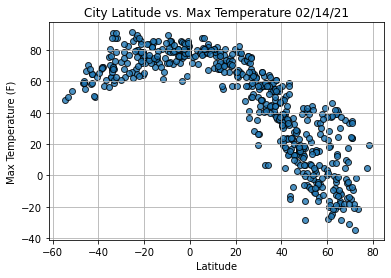

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

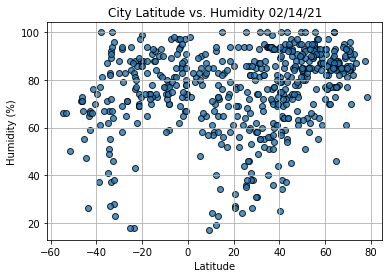

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

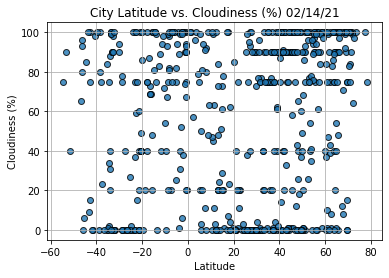

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

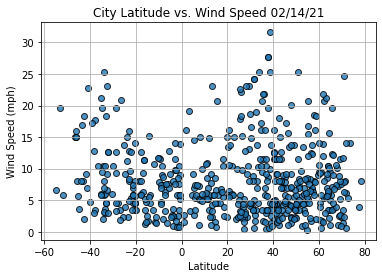

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
# To create a new DataFrame from a current DataFrame, 
# we can use the loc method on the current DataFrame
index13 = city_data_df.loc[13]
index13

City                       Albany
Country                        US
Date          2021-02-15 03:22:01
Lat                       42.6001
Lng                      -73.9662
Max Temp                    24.01
Humidity                       59
Cloudiness                    100
Wind Speed                   1.01
Name: 13, dtype: object

In [26]:
# Filter a DataFrame based on a value of a row.
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
546     True
547     True
548     True
549     True
550     True
Name: Lat, Length: 551, dtype: bool

In [27]:
# Return a DataFrame with all data fitting the criteria, 
# for latitudes greater than or equal to 0, we can use the 
# loc method 
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Butaritari,KI,2021-02-15 03:25:58,3.0707,172.7902,79.92,79,96,19.15
2,Marsh Harbour,BS,2021-02-15 03:25:59,26.5412,-77.0636,75.81,86,0,15.19
5,Nikolskoye,RU,2021-02-15 03:25:59,59.7035,30.7861,0.00,77,40,8.95
6,Ostrovnoy,RU,2021-02-15 03:26:00,68.0531,39.5131,9.97,95,100,10.07
11,Asfi,MA,2021-02-15 03:26:01,32.2994,-9.2372,63.46,69,0,2.71


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

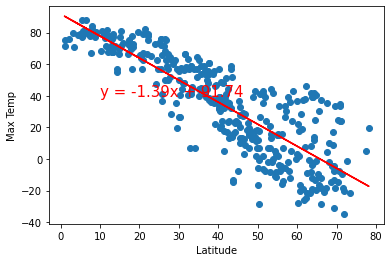

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

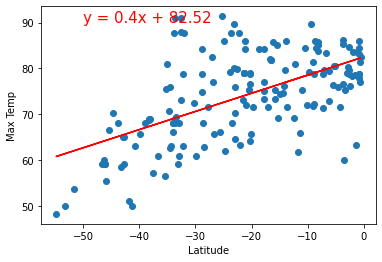

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature", 'Max Temp',(-50,90))

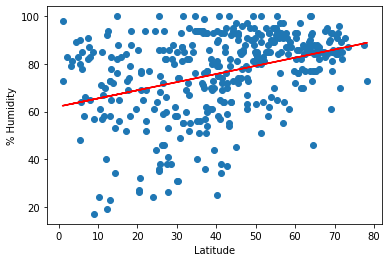

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

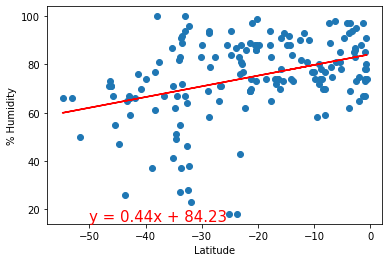

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

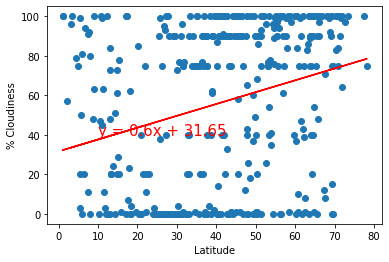

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,40))

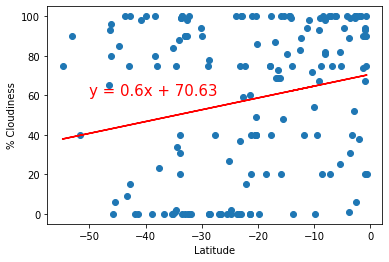

In [39]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

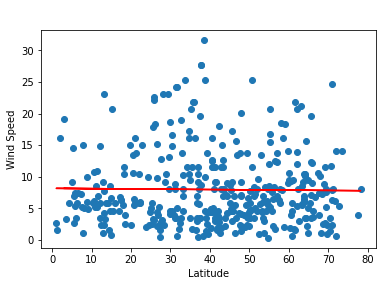

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

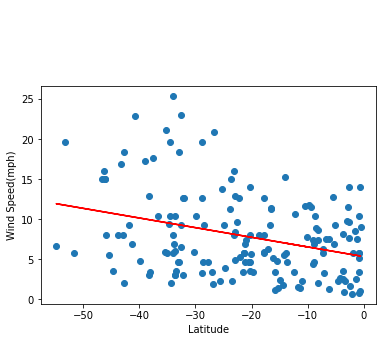

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed','Wind Speed(mph)',(-50,35))

In [44]:
conda install -c conda-forge gmaps

Solving environment: done

## Package Plan ##

  environment location: /Users/ericmeneses/opt/anaconda3

  added / updated specs:
    - gmaps


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py38h50d1736_0         3.1 MB  conda-forge
    geojson-2.5.0              |             py_0          15 KB  conda-forge
    gmaps-0.9.0                |             py_0         1.7 MB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.8 MB

The following NEW packages will be INSTALLED:

  geojson            conda-forge/noarch::geojson-2.5.0-py_0
  gmaps              conda-forge/noarch::gmaps-0.9.0-py_0
  python_abi         conda-forge/osx-64::python_abi-3.8-1_cp38

The following packages will be SUPERSEDE

In [45]:
pip install gmaps

Note: you may need to restart the kernel to use updated packages.
